In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
dataframe = pd.read_csv(r"indicadores_H5W1_wordnet_CLASS.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,CLASS
0,0.800000,0.000000,0.0,0.833333,0.0,0.0,0.0,entailment
1,0.947368,0.000000,0.0,1.000000,0.0,0.0,1.0,entailment
2,1.000000,0.769231,0.0,0.833333,0.0,0.0,0.0,contradiction
3,0.666667,0.000000,0.0,1.000000,0.0,0.0,0.0,contradiction
4,1.000000,1.000000,0.0,0.769231,0.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...
95,0.947368,0.000000,0.0,1.000000,0.0,0.0,0.0,entailment
96,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,entailment
97,0.705882,0.000000,0.0,0.705882,0.0,0.0,0.0,contradiction
98,1.000000,0.000000,0.0,0.750000,0.0,0.0,0.0,contradiction


In [4]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.877850,0.282823,0.027714,0.708082,0.045000,0.078959,0.123725
std,0.260423,0.399454,0.152081,0.338315,0.202198,0.233775,0.300032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.889286,0.000000,0.000000,0.567460,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.788889,0.000000,0.000000,0.000000
75%,1.000000,0.625000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


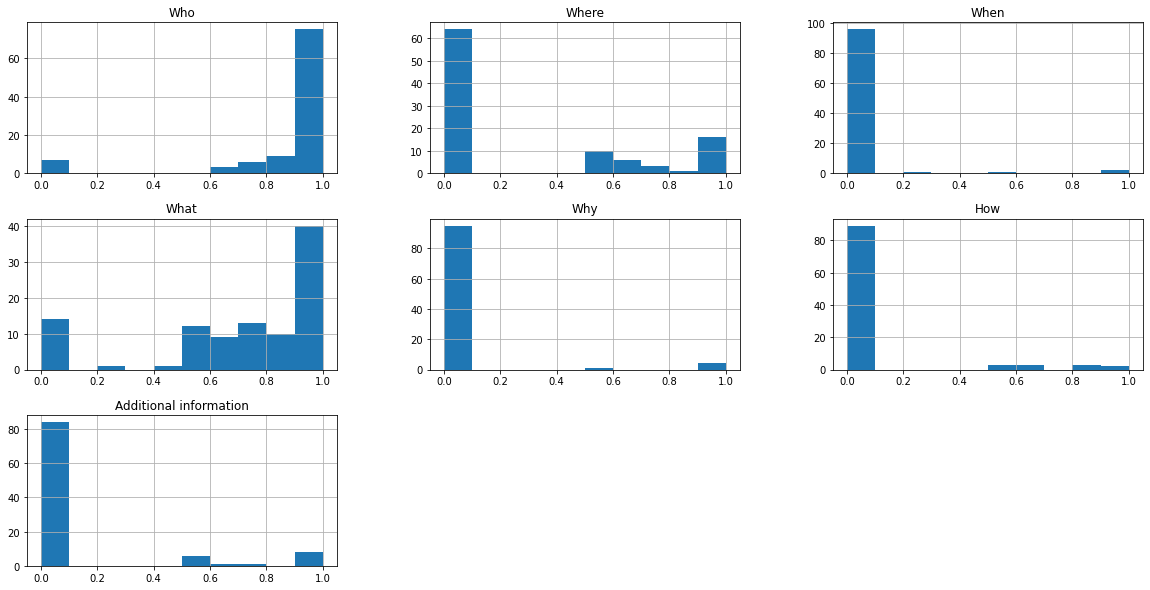

In [6]:
dataframe.hist(figsize=(20,10))
plt.show()

/home/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


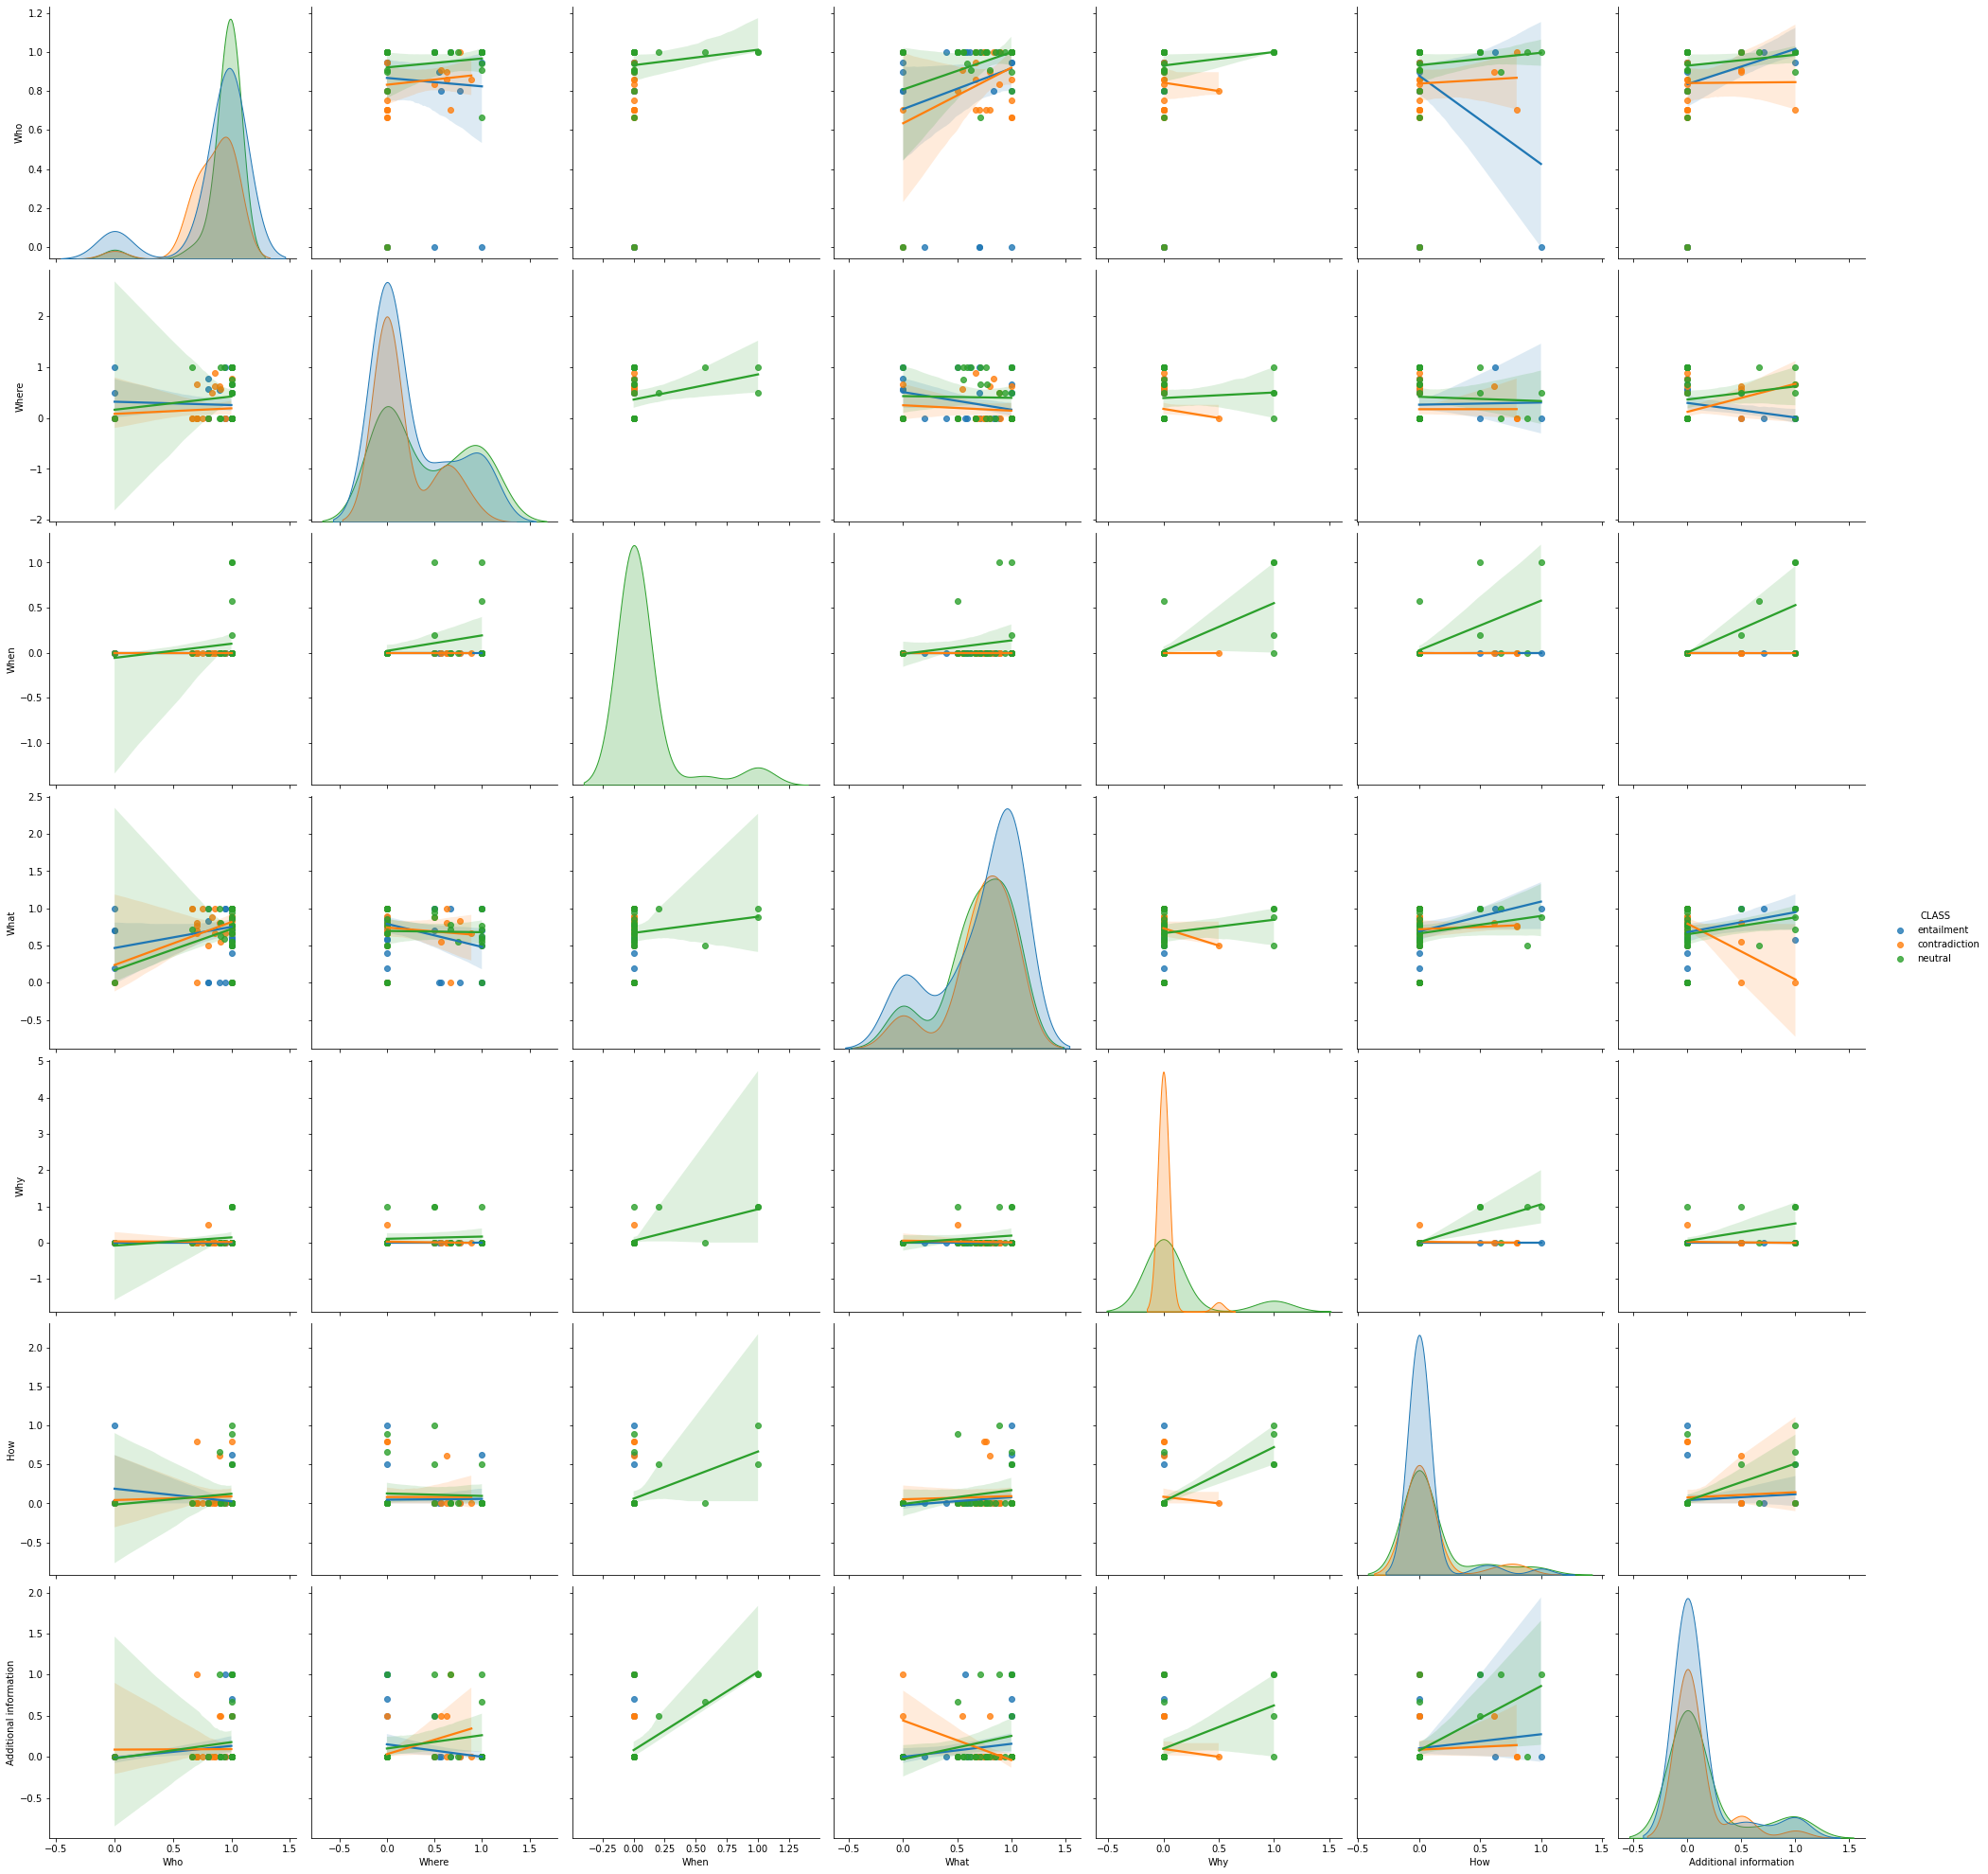

In [8]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [9]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_118038/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_118038/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 7)

In [10]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [11]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [12]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [13]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
model.decision_function(X)

array([[-0.11496095,  0.28756977, -0.17260882],
       [-0.17895633,  0.26622783, -0.0872715 ],
       [-0.28797712,  0.24346992,  0.0445072 ],
       [-0.09924861,  0.29954339, -0.20029479],
       [-0.33688935,  0.23363969,  0.10324966],
       [-0.31143427,  0.2568323 ,  0.05460197],
       [-0.49211016, -0.05111961,  0.54322977],
       [-0.32168534,  0.18487184,  0.1368135 ],
       [-0.38671165, -0.07504768,  0.46175933],
       [-0.12631446,  0.27556538, -0.14925091],
       [-0.13050246,  0.2735233 , -0.14302084],
       [-0.0986112 ,  0.22667377, -0.12806257],
       [-0.12631446,  0.27556538, -0.14925091],
       [-0.12284184,  0.20534652, -0.08250468],
       [-0.32747899,  0.23260639,  0.09487261],
       [-0.41512317,  0.17162245,  0.24350072],
       [-0.16649006,  0.2663017 , -0.09981164],
       [-0.30565095,  0.24674176,  0.05890919],
       [-0.09924861,  0.29954339, -0.20029479],
       [-0.12631446,  0.27556538, -0.14925091],
       [-0.15563048,  0.26127086, -0.105

In [16]:
labels=['Who','Where','When','What','Why','How','Additional information']

In [17]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [18]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [19]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  3 What 1 Where
Entailment  3 What 4 Why
Neutral  1 Where 3 What


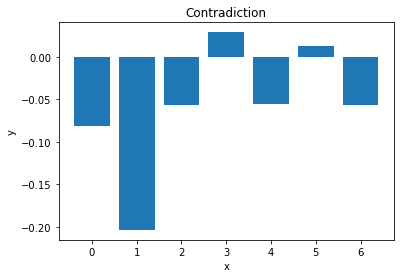

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,7,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

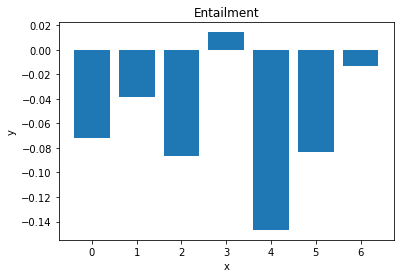

In [22]:
x_v = np.arange(0,7,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

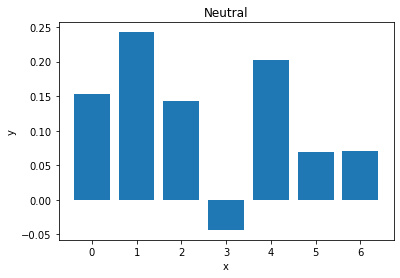

In [23]:
x_v = np.arange(0,7,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [43]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailm

In [44]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [45]:
X

array([[0.8       , 0.        , 0.        , 0.83333333, 0.        ,
        0.        , 0.        ],
       [0.94736842, 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.76923077, 0.        , 0.83333333, 0.        ,
        0.        , 0.        ],
       [0.66666667, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.76923077, 0.        ,
        0.        , 0.        ],
       [0.66666667, 1.        , 0.        , 0.71428571, 0.        ,
        0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.5       , 1.        ],
       [1.        , 1.        , 0.        , 1.        , 0.        ,
        0.625     , 0.        ],
       [1.        , 0.5       , 1.        , 0.88888889, 1.        ,
        1.        , 1.        ],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0. 

In [46]:
model.score(X,y)

0.47

In [47]:
validation_size = 0.05
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [48]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.422222 (0.156110)


In [49]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [50]:
print(confusion_matrix(Y_validation, predictions))

[[0 2 0]
 [0 2 0]
 [0 0 1]]


In [51]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         2
   entailment       0.50      1.00      0.67         2
      neutral       1.00      1.00      1.00         1

     accuracy                           0.60         5
    macro avg       0.50      0.67      0.56         5
 weighted avg       0.40      0.60      0.47         5



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [52]:
#X_new = pd.DataFrame()
#model.predict(X_new)